Import dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Load data

In [3]:
data: pd.DataFrame = pd.read_excel(io=r"C:\Users\marcu\Documents\Professional\Quantitative Trading Firm Base Salaries.xlsx")
data = data.set_index(keys="Firm")
data

,Low,Mid,High
Firm,,,
Akuna,130,165.0,200
AQR,140,147.5,155
Aquatic,150,225.0,300
Balyasny,150,175.0,200
Belvedere,150,175.0,200
Blackstone,160,205.0,250
Bridgewater,150,175.0,200
Citadel,200,250.0,300
Citadel Securities,175,262.5,350


In [6]:
data.describe()

,Low,Mid,High
count,39.000000,39.000000,39.000000
mean,159.205128,203.141026,247.076923
std,30.279557,37.079564,53.044859
min,100.000000,147.500000,155.000000
25%,150.000000,175.000000,200.000000
50%,150.000000,200.000000,250.000000
75%,175.000000,225.000000,300.000000
max,250.000000,275.000000,350.000000


count    117.000000
mean     203.141026
std       54.502248
min      100.000000
25%      162.500000
50%      200.000000
75%      245.000000
max      350.000000
dtype: float64

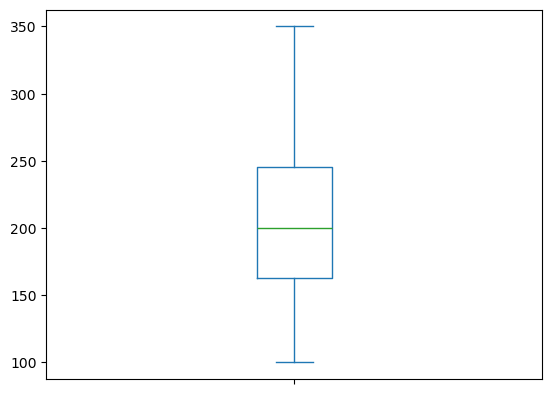

In [9]:
pd.Series(data.to_numpy().flatten()).plot(kind="box")
pd.Series(data.to_numpy().flatten()).describe()

In [18]:
flattened_data: pd.Series = pd.Series(data.to_numpy().flatten())

negotiation_increments = pd.Series(
    {
        "high": flattened_data.quantile(q=0.75) * 1.4,
        "mid": 225 * 1.4,
        "low": flattened_data.quantile(q=0.625) * 1.4,
        "target": flattened_data.quantile(q=0.50) * 1.4
    }
)

negotiation_increments

high      343.0
mid       315.0
low       297.5
target    280.0
dtype: float64

Plot data

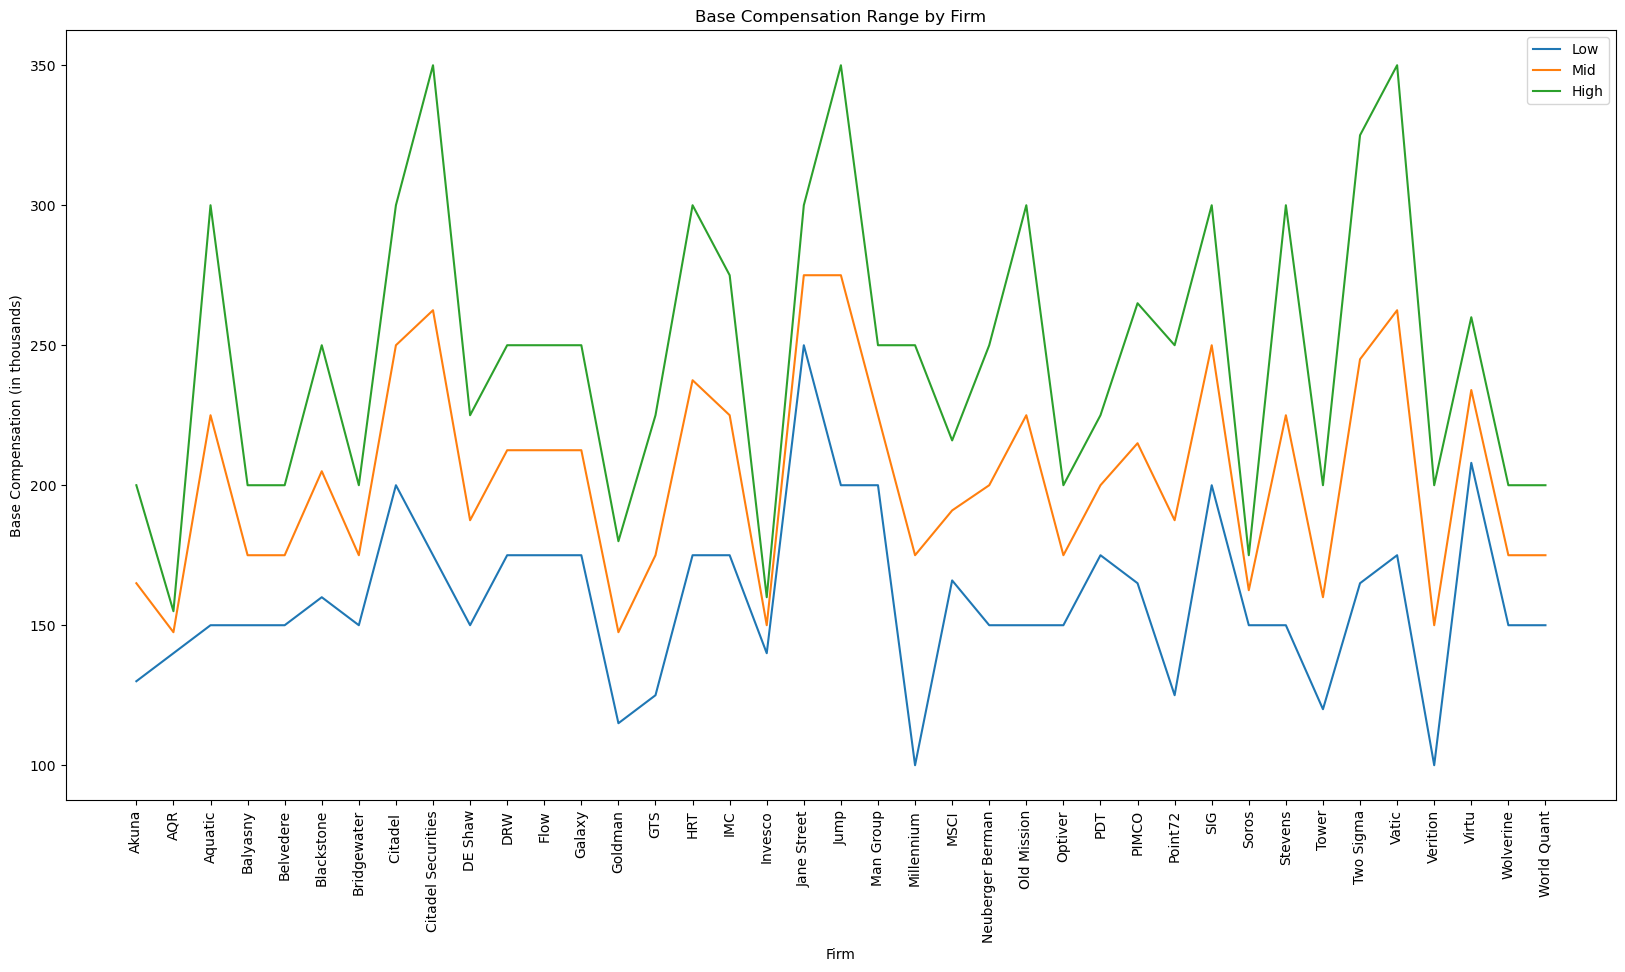

In [3]:
data.plot(figsize=(20, 10), ylabel="Base Compensation (in thousands)", title="Base Compensation Range by Firm")
plt.xticks(ticks=range(len(data.index)), labels=data.index, rotation=90)
plt.show()

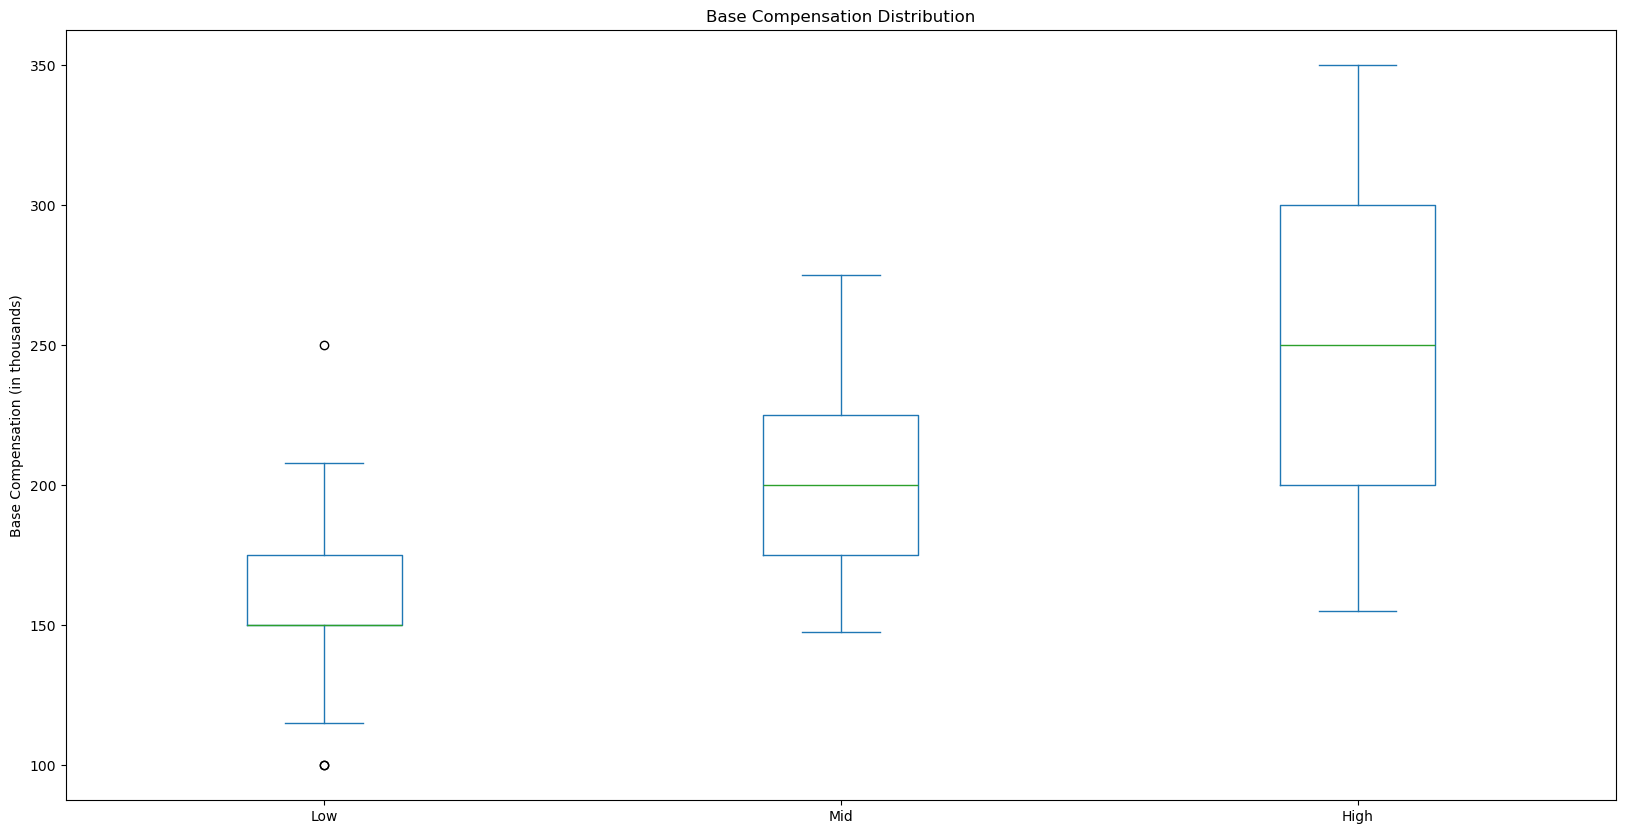

In [4]:
data.plot(
    kind="box", 
    figsize=(20, 10),
    title="Base Compensation Distribution",
    ylabel="Base Compensation (in thousands)", 
)
plt.show()

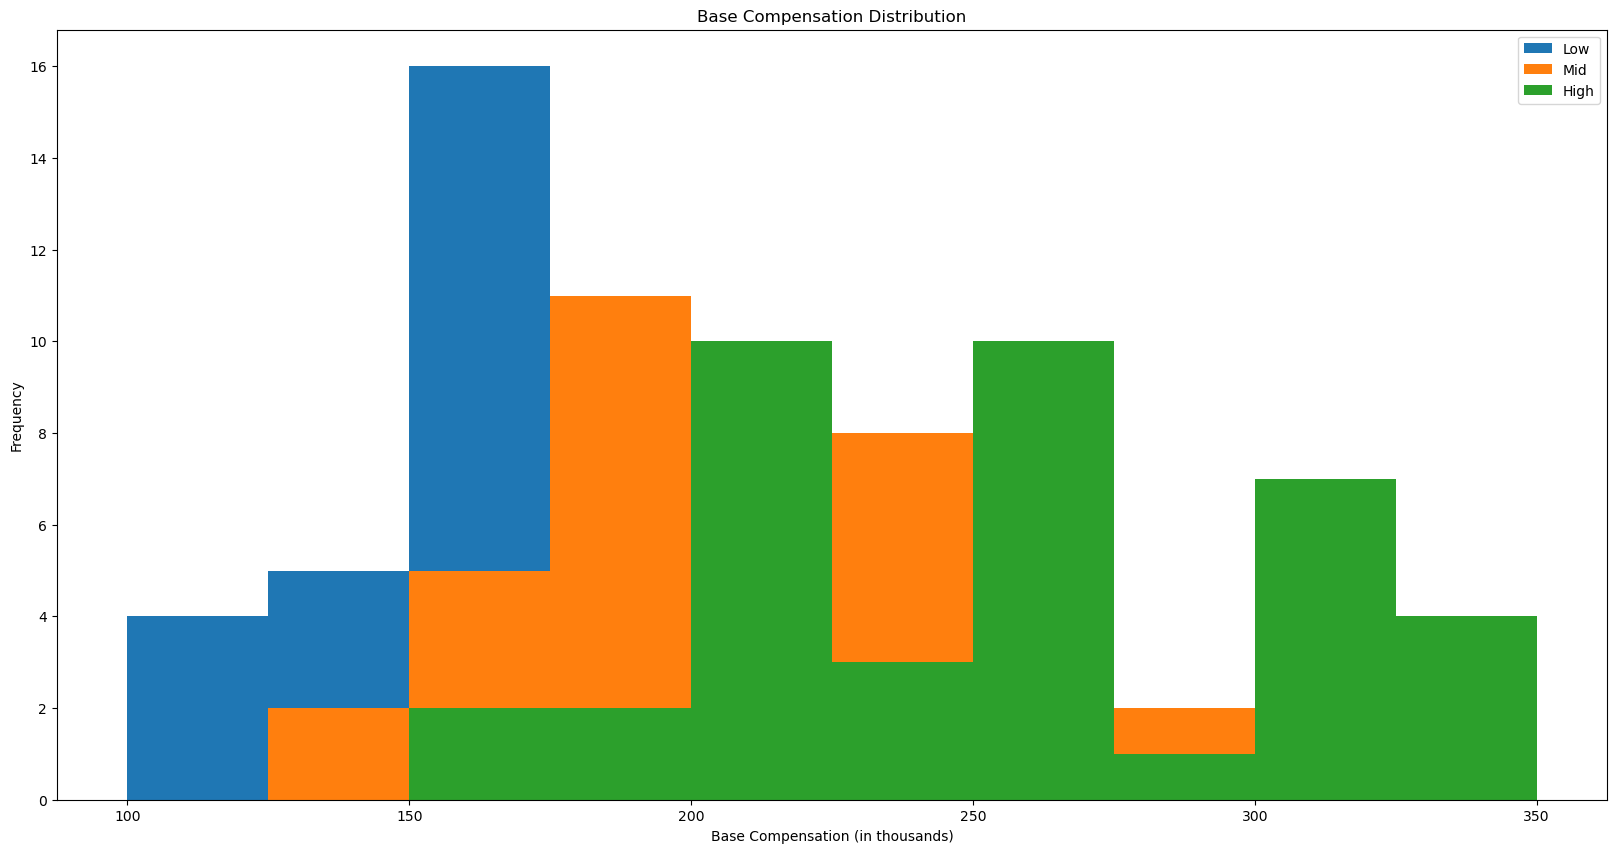

In [5]:
data.plot(
    kind="hist", 
    bins=10, 
    figsize=(20, 10),
    title="Base Compensation Distribution",
    xlabel="Base Compensation (in thousands)" 
)
plt.show()

Bootstrap data

In [6]:
bootstrapped_data: pd.DataFrame = data.apply(lambda x: np.random.choice(a=x, replace=True, size=10_000), axis=0)
bootstrapped_data

,Low,Mid,High
0,100,212.5,155
1,150,175.0,300
2,175,237.5,265
3,125,250.0,250
4,175,160.0,180
...,...,...,...
9995,175,200.0,250
9996,150,165.0,265
9997,175,150.0,250
9998,150,225.0,250


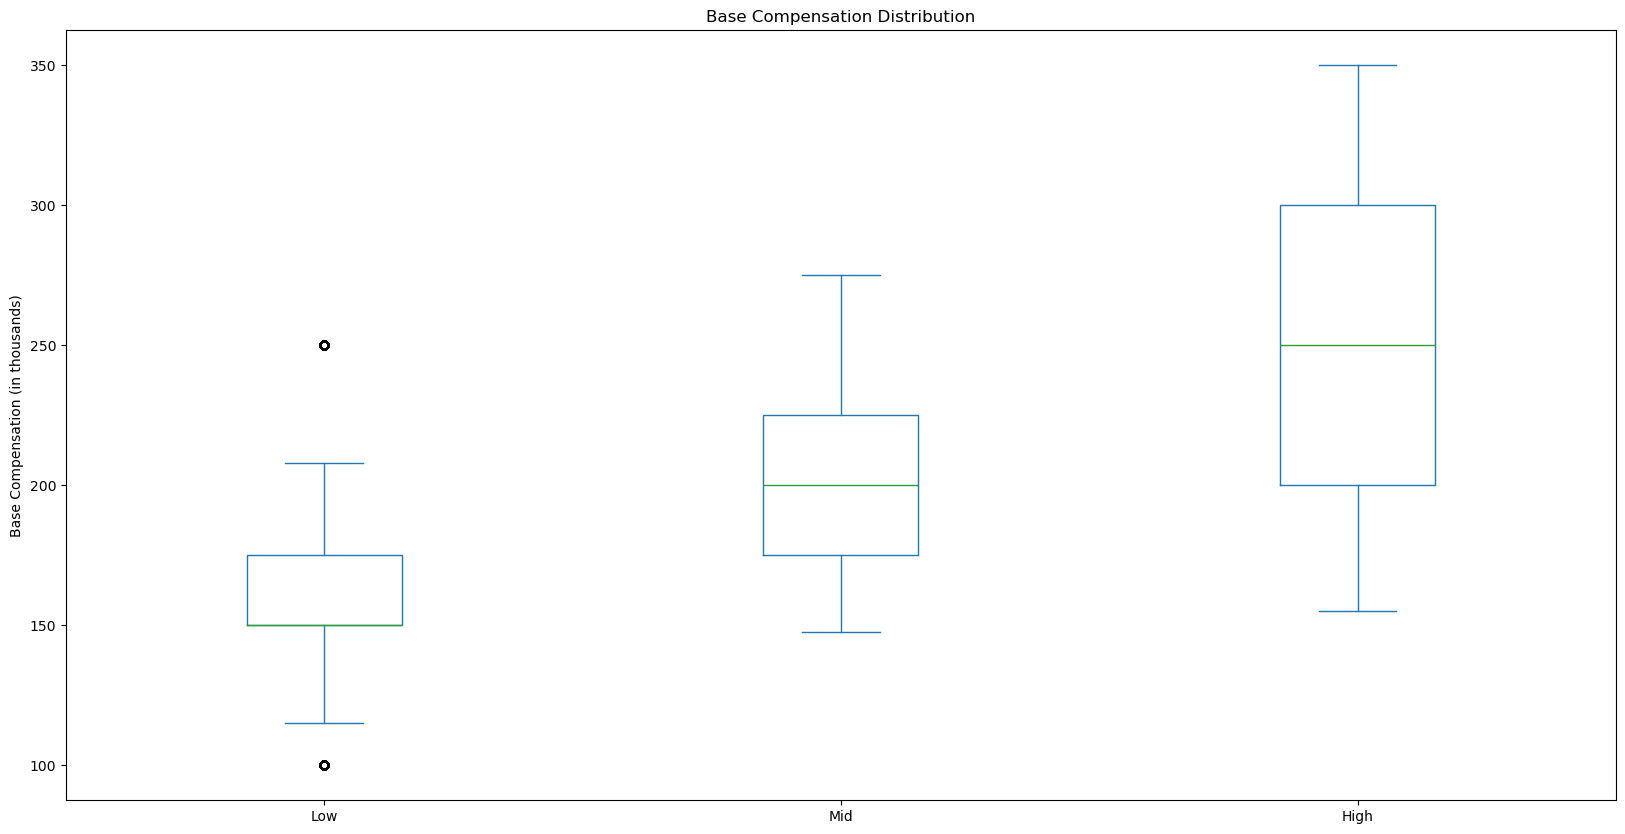

In [7]:
bootstrapped_data.plot(
    kind="box", 
    figsize=(20, 10), 
    title="Base Compensation Distribution",
    ylabel="Base Compensation (in thousands)"
)
plt.show()

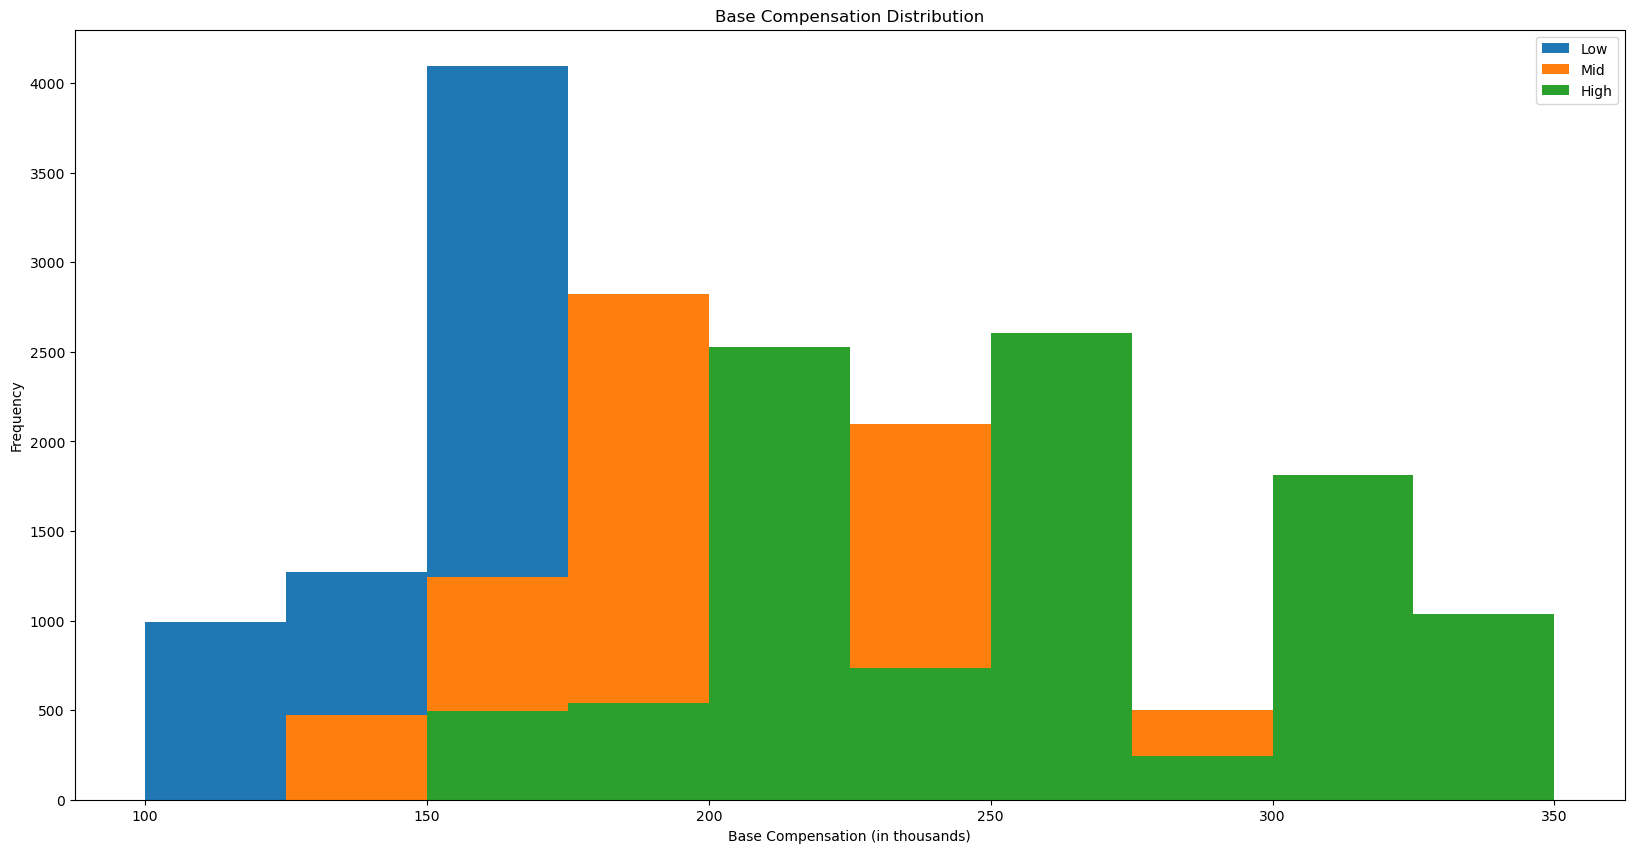

In [8]:
bootstrapped_data.plot(
    kind="hist", 
    bins=10, 
    figsize=(20, 10),
    xlabel="Base Compensation (in thousands)", 
    title="Base Compensation Distribution"
)
plt.show()

Define bonus percentage frontier

In [9]:
bonus_frontier: np.ndarray = np.linspace(start=0.00, stop=1.0, num=11).round(1)
bonus_frontier_matrix: pd.DataFrame = pd.DataFrame(np.array([bonus_frontier] * bootstrapped_data.shape[0]))
bonus_frontier_matrix

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
2,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
3,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
4,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
9996,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
9997,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
9998,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0


Plot low, mid, and high total compensation frontier 

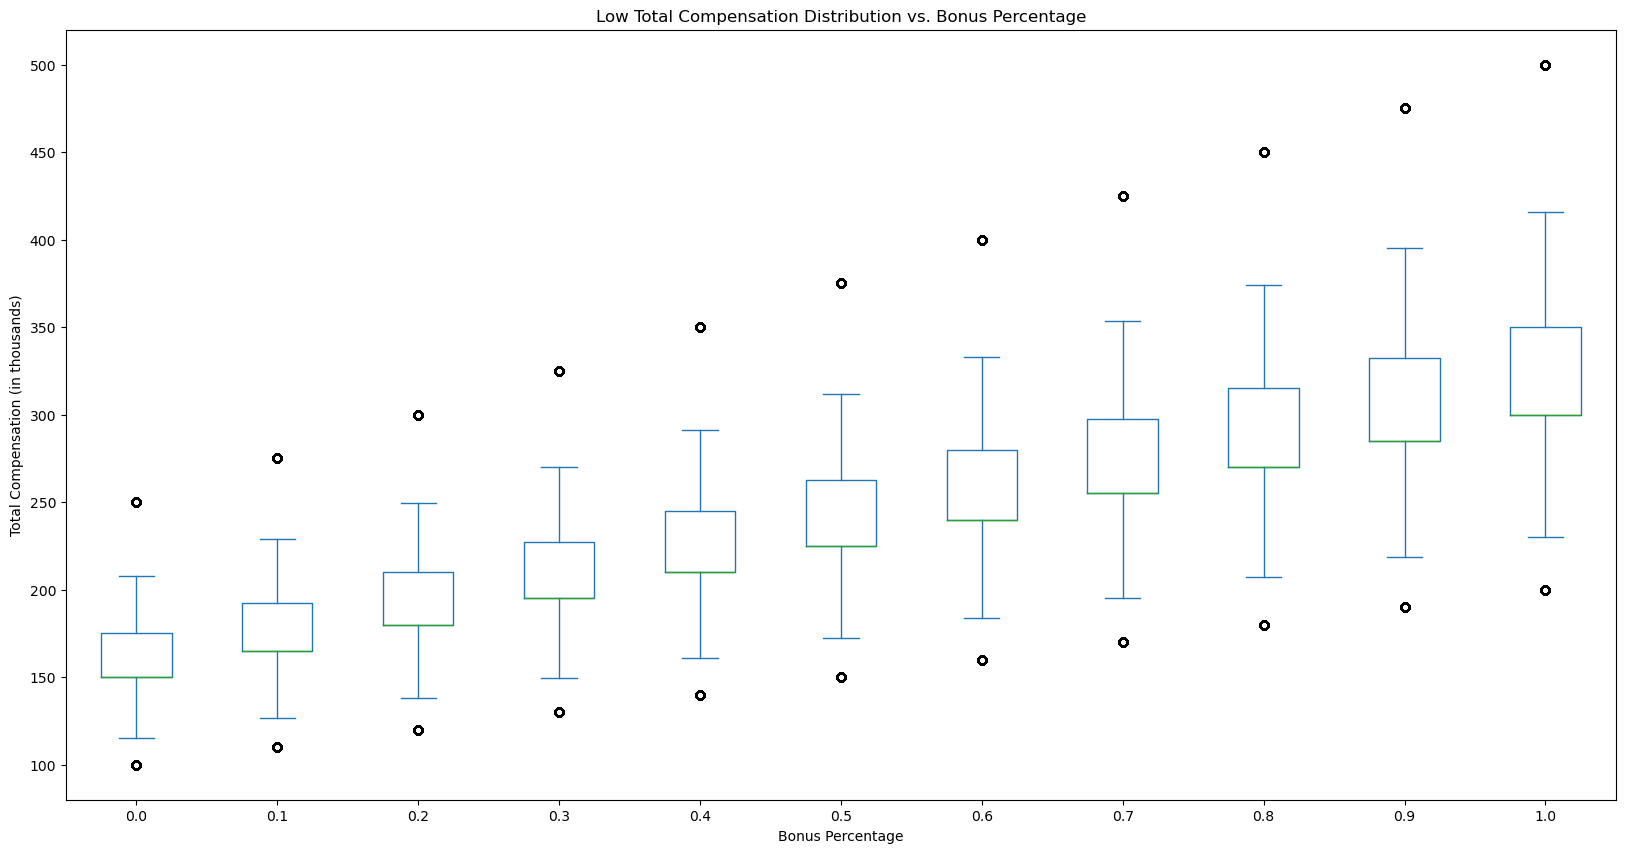

In [10]:
(1 + bonus_frontier_matrix).multiply(bootstrapped_data["Low"], axis=0).plot(
    kind="box",
    figsize=(20, 10),
    xlabel="Bonus Percentage",
    ylabel="Total Compensation (in thousands)",
    title="Low Total Compensation Distribution vs. Bonus Percentage",
)
plt.xticks(ticks=np.arange(start=1, stop=bonus_frontier_matrix.shape[1] + 1, step=1), labels=bonus_frontier)
plt.show()

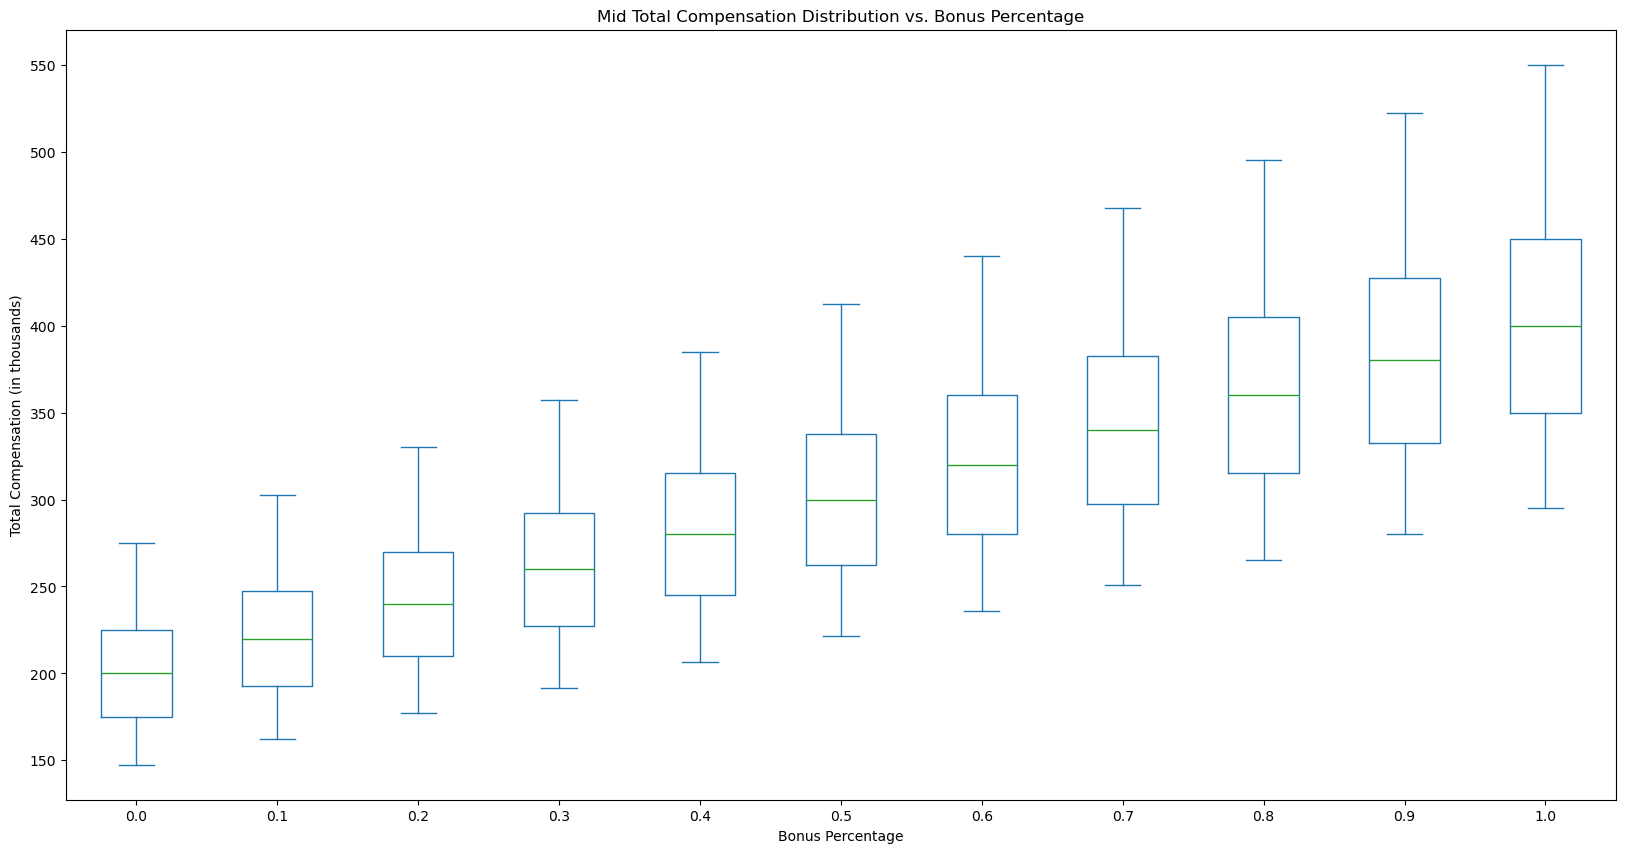

In [11]:
(1 + bonus_frontier_matrix).multiply(bootstrapped_data["Mid"], axis=0).plot(
    kind="box",
    figsize=(20, 10),
    xlabel="Bonus Percentage",
    ylabel="Total Compensation (in thousands)",
    title="Mid Total Compensation Distribution vs. Bonus Percentage",
)
plt.xticks(ticks=np.arange(start=1, stop=bonus_frontier_matrix.shape[1] + 1, step=1), labels=bonus_frontier)
plt.show()

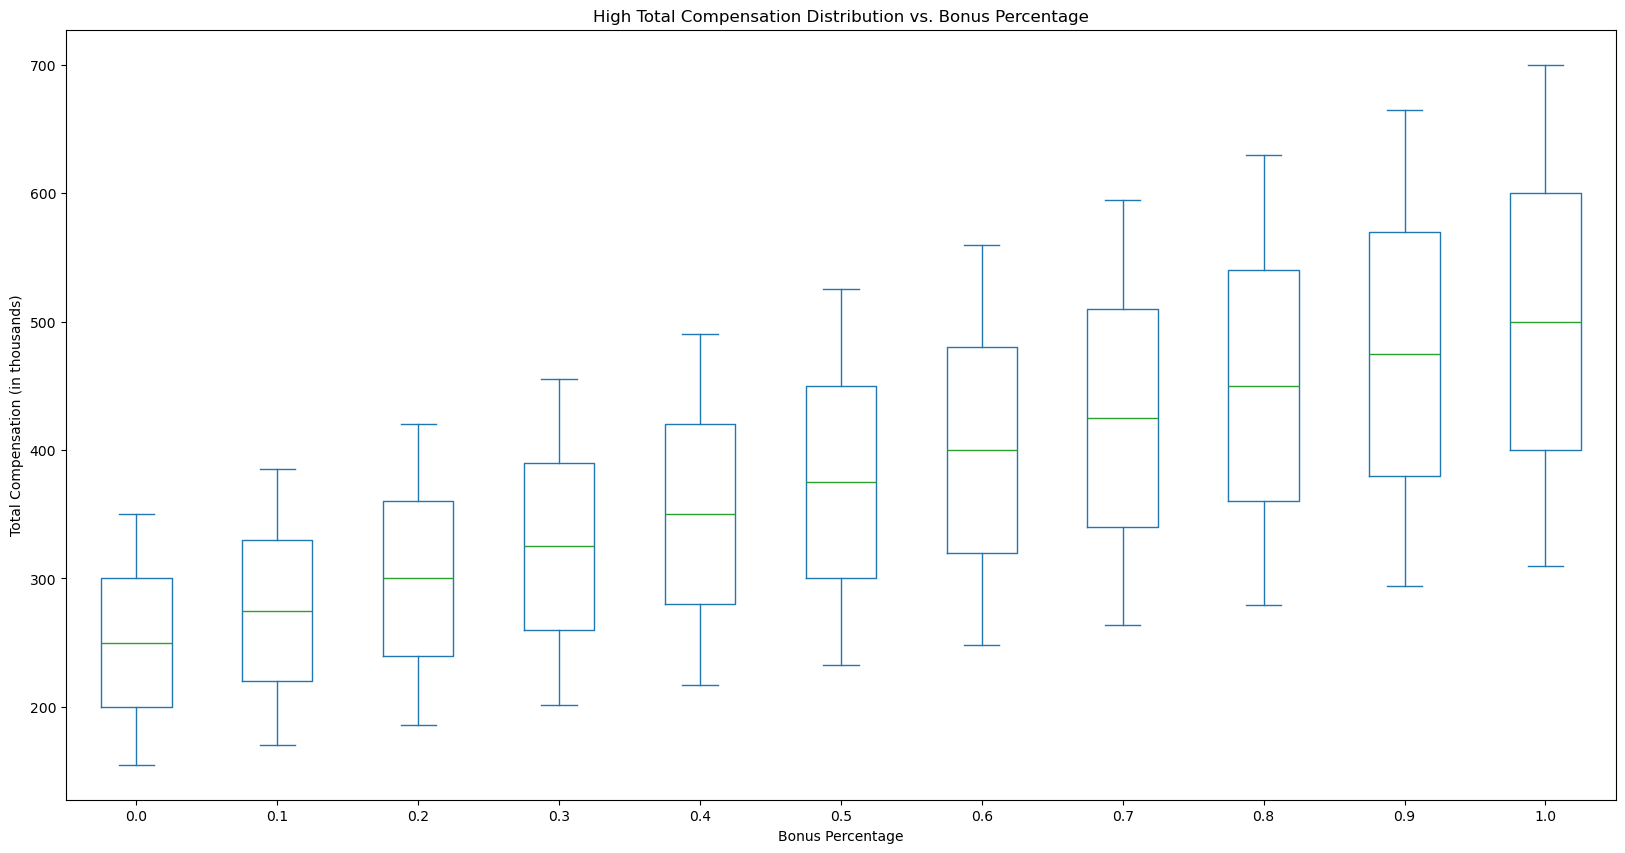

In [12]:
(1 + bonus_frontier_matrix).multiply(bootstrapped_data["High"], axis=0).plot(
    kind="box",
    figsize=(20, 10),
    xlabel="Bonus Percentage",
    ylabel="Total Compensation (in thousands)",
    title="High Total Compensation Distribution vs. Bonus Percentage",
)
plt.xticks(ticks=np.arange(start=1, stop=bonus_frontier_matrix.shape[1] + 1, step=1), labels=bonus_frontier)
plt.show()